<a href="https://colab.research.google.com/github/churry75/tf_tutorial/blob/master/tf_tutorial_03_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequential API를 사용하여 회귀용 다층 퍼셉트론 만들기
> 핸즈온 머신러닝 2판(한빛미디어)의 내용을 인용하였습니다.

- 캘리포니아 주택 가격 데이터셋을 이용하여 회귀 신경만 만들기

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()

In [6]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [7]:
scaler = StandardScaler()

In [8]:
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

- 분류 문제와의 차이점
    - 출력층이 활성화 함수가 없는 하나의 뉴런(하나의 값을 예측하기 때문)을 가진다
    - 손실 함수로 평균 제곱 오차(Mean Square Error, MSE)를 사용

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
                                 keras.layers.Dense(1)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.SGD(learning_rate=0.01))

In [13]:
histo = model.fit(x_train, y_train, epochs=30,
                  validation_data=(x_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3454 - val_loss: 0.5703
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5870 - val_loss: 0.5180
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5430 - val_loss: 0.4512
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4753 - val_loss: 0.4330
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4293 - val_loss: 0.4251
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4225 - val_loss: 0.4163
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4053 - val_loss: 0.4307
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4031 - val_loss: 0.4044
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3982 - val_loss: 0.3992
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3999 - val_loss: 0.3992

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

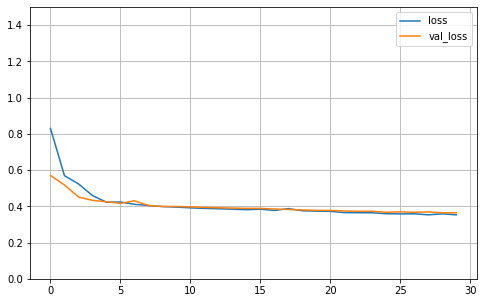

In [15]:
pd.DataFrame(histo.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()

In [16]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 843us/step - loss: 0.3660


0.36595556139945984

In [17]:
x_new = x_test[:3]
model.predict(x_new)

array([[1.3861332],
       [5.1629033],
       [2.7701619]], dtype=float32)

# Functional API를 사용하여 복잡한 모델 만들기
- 함수형 API를 사용하면 신경망이 복잡한 패턴과 간단한 패턴을 모두 학습할 수 있는 장점이 있다.
- 층을 만들고, 이를 바로 함수처럼 호출하여 변수에 저장하기 때문에 함수형 API 라고 한다.

## 하나의 Input을 사용하여 만들기

In [18]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_3[0][0]                

## 두 개의 Input을 사용하여 만들기
- 일부 특성은 짧은 경로로, 나머지는 복잡한 경로로 전달할 때 사용

In [20]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
____________________________________________________________________________________________

In [22]:
model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [23]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [24]:
x_train_A.shape, x_train_B.shape

((11610, 5), (11610, 6))

In [25]:
x_valid_A.shape, x_valid_B.shape

((3870, 5), (3870, 6))

- 입력값을 전달할 때, 튜플 형태로 전달

In [26]:
histo = model.fit((x_train_A, x_train_B), y_train, epochs=20,
                  validation_data=((x_valid_A, x_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7520 - val_loss: 0.9681
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8925 - val_loss: 0.7902
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7497 - val_loss: 0.6993
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6463 - val_loss: 0.6426
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6214 - val_loss: 0.5996
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5631 - val_loss: 0.5698
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5514 - val_loss: 0.5465
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5568 - val_loss: 0.5306
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5175 - val_loss: 0.5194
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5223 - val_loss: 0.5077

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

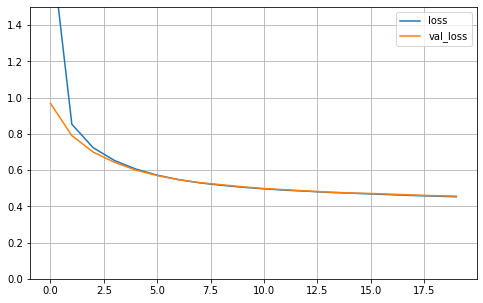

In [28]:
pd.DataFrame(histo.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()

In [29]:
mse_test = model.evaluate((x_test_A, x_test_B), y_test)

162/162 [==============================] - 0s 851us/step - loss: 0.4542


In [30]:
model.predict((x_new_A, x_new_B))

array([[1.4552605],
       [5.552653 ],
       [3.0442457]], dtype=float32)

### 여러 개의 출력이 필요한 경우
- 그림에 있는 주요 물체를 분류하고 위치를 알아야 할 때
    - 회귀 작업(물체 중심의 좌표와 너비, 높이를 찾기)
    - 분류 작업
    - 두 작업이 같이 이루어져야하기 때문에 여러 출력이 필요하다.
- 동일한 데이터에서 독립적인 여러 작업을 수행할 때
    - ex. 얼굴 사진으로 다중 작업 분류(multitask classification)을 수행
    - 한 출력은 사람의 얼굴 표정(기쁨, 놀람 등)을 분류
    - 다른 출력은 안경을 썻는지 구별
- 규제 기법으로 사용하는 경우
    - 과대적합을 감소하고 모델의 일반화 성능을 높이도록 훈련에 제약
    - 신경망 구조 안에 보조 출력을 추가
    - 보조 출력으로 하위 네트워크가 나머지 네트워크에 의존하지 않고 그 자체로 유용한 것을 학습하는지 확인

## 보조 출력 추가하기
> 출력층 까지는 이전까지의 코드와 동일

In [31]:
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

- 각 출력은 자신만의 손실함수가 필요하다
    - 따라서 모델을 컴파일 할 때 손실의 리스트를 전달해야 한다.
        - 하나의 손실을 전달하면 케라스는 모든 출력의 손실 함수가 동일하다고 가정함
    - 나열된 손실을 모두 더하여 최종 손실을 구해 훈련에 사용한다.
        - 따라서, 주 출력의 손실에 더 많이 가중치를 부여해야함

In [32]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [33]:
histo = model.fit(
    [x_train_A, x_train_B], [y_train, y_train], epochs=20,
    validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2273 - main_output_loss: 1.0359 - aux_output_loss: 2.9503 - val_loss: 0.5381 - val_main_output_loss: 0.4579 - val_aux_output_loss: 1.2598
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5345 - main_output_loss: 0.4561 - aux_output_loss: 1.2399 - val_loss: 0.5085 - val_main_output_loss: 0.4426 - val_aux_output_loss: 1.1019
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5135 - main_output_loss: 0.4503 - aux_output_loss: 1.0826 - val_loss: 0.4890 - val_main_output_loss: 0.4389 - val_aux_output_loss: 0.9402
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4644 - main_output_loss: 0.4125 - aux_output_loss: 0.9308 - val_loss: 0.4692 - val_main_output_loss: 0.4283 - val_aux_output_loss: 0.8377
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5173 - main_output_loss: 0.4786 - aux_output_loss: 0.8657 - val_loss

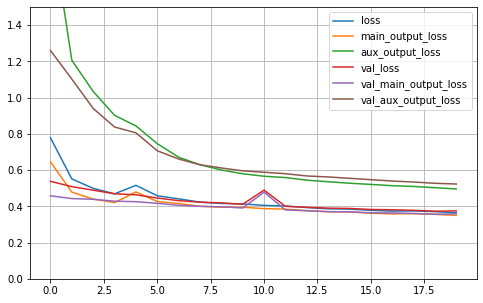

In [34]:
pd.DataFrame(histo.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()

In [35]:
total_loss, main_loss, aux_loss = model.evaluate(
    [x_test_A, x_test_B], [y_test, y_test]
)

162/162 [==============================] - 0s 1ms/step - loss: 0.4108 - main_output_loss: 0.4006 - aux_output_loss: 0.5023


In [37]:
y_pred_main, y_pred_aux = model.predict([x_new_A, x_new_B])

In [38]:
y_pred_main

array([[1.2973297],
       [5.398636 ],
       [3.0087276]], dtype=float32)

In [39]:
y_pred_aux

array([[1.1727908],
       [4.0959883],
       [2.8148499]], dtype=float32)

# 모델 저장과 복원

In [ ]:
model.save('my_keras_model.h5')

- HDF5 포맷 사용
- 모든 층의 하이퍼파라미터를 포함하여 모델 구조와 층의 모든 모델 파라미터(연결 가중치와 편향)을 저장
- 또한 하이퍼파라미터와 현재 상태를 포함하여 옵티마이저도 저장

In [ ]:
model = keras.models.load_model('my_keras_model.h5')